#**CARACTERIZACIÓN, CREACIÓN DE DATASET Y LECTURA**

***IABO - Inteligencia Artificial de Borde***

Javier Chaparro

#**Caracterización de las señales de la IMU**

En esta primera parte se hace una explicación de la forma de crear un dataset a partir de señales de un sensor inercial embebido en un SoC 33BLEsense desde un archivo de Excel.

Lectura de los datos de archivo de excel

Archivos recomendados: 
1. IMU_ladrilloA0.xlsx
2. IMU_pastoA2.xlsx
3. IMU_piedraA0.xlsx
4. IMU_arenaA0.xlsx

Se instalan librarias para leer archivo XLSX

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
wb=xlrd.open_workbook("/content/DatosIABO (1).csv.xlsx")
sheet = wb.sheet_by_index(0)
# Lectura de las variables de la IMU
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
# Gráfica de las variables
plt.subplot(321)
plt.plot(ax)
plt.subplot(322)
plt.plot(ay)
plt.subplot(323)
plt.plot(az)
plt.subplot(324)
plt.plot(gx)
plt.subplot(325)
plt.plot(gy)
plt.subplot(326)
plt.plot(gz)

FileNotFoundError: ignored

Caracterizazión de las señales del acelerómetro y giroscopio obtenidas de la IMU mediante:


1.   **Varianza**
2.   Entropia (pendiente)



Parámetros para la segmentación de la señal y su caracterización

In [ ]:
N=10.0                      # Número de muestras
nV=np.array(np.shape(ax))   # Número de muestras de la señal
segment = np.floor(nV/N)    # Número de segmetos de la señal
print("Segmentos : ",segment)

Segmentos :  [599.]


Segmentación y cálculo de la varianza de señales de la clase PIEDRA

In [ ]:
var_ventana_axPI=[]
var_ventana_ayPI=[]
var_ventana_azPI=[]
var_ventana_gxPI=[]
var_ventana_gyPI=[]
var_ventana_gzPI=[]

for i in range (0,np.int(segment)):
  ventana_ax=ax[int(i*N):int((i+1)*N)]
  ventana_ay=ay[int(i*N):int((i+1)*N)]
  ventana_az=az[int(i*N):int((i+1)*N)]
  ventana_gx=gx[int(i*N):int((i+1)*N)]
  ventana_gy=gy[int(i*N):int((i+1)*N)]
  ventana_gz=gz[int(i*N):int((i+1)*N)]
 


  
  var_ventana_axPI.append(np.var(ventana_ax))
  var_ventana_ayPI.append(np.var(ventana_ay))
  var_ventana_azPI.append(np.var(ventana_az))
  var_ventana_gxPI.append(np.var(ventana_gx))
  var_ventana_gyPI.append(np.var(ventana_gy))
  var_ventana_gzPI.append(np.var(ventana_gz))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


TypeError: ignored

Segmentación y cálculo de la varianza de señales de la clase PASTO

In [ ]:
wb=xlrd.open_workbook("/content/PISOS/pasto/IMU_pastoA4.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
var_ventana_axPA=[]
var_ventana_ayPA=[]
var_ventana_azPA=[]
var_ventana_gxPA=[]
var_ventana_gyPA=[]
var_ventana_gzPA=[]

for i in range (0,np.int(segment)):
  ventana_axPA=ax[int(i*N):int((i+1)*N)]
  ventana_ayPA=ay[int(i*N):int((i+1)*N)]
  ventana_azPA=az[int(i*N):int((i+1)*N)]
  ventana_gxPA=gx[int(i*N):int((i+1)*N)]
  ventana_gyPA=gy[int(i*N):int((i+1)*N)]
  ventana_gzPA=gz[int(i*N):int((i+1)*N)]
  var_ventana_axPA.append(np.var(ventana_axPA))
  var_ventana_ayPA.append(np.var(ventana_ayPA))
  var_ventana_azPA.append(np.var(ventana_azPA))
  var_ventana_gxPA.append(np.var(ventana_gxPA))
  var_ventana_gyPA.append(np.var(ventana_gyPA))
  var_ventana_gzPA.append(np.var(ventana_gzPA))

FileNotFoundError: ignored

Comparación gráfica de la característica "Varianza" en las dos clases (PIEDRA y PASTO)

In [ ]:
plt.subplot(321)
plt.plot(var_ventana_axPI)
plt.subplot(323)
plt.plot(var_ventana_ayPI)
plt.subplot(325)
plt.plot(var_ventana_azPI)
plt.subplot(322)
plt.plot(var_ventana_axPA)
plt.subplot(324)
plt.plot(var_ventana_ayPA)
plt.subplot(326)
plt.plot(var_ventana_azPA)

Creación del vector de clases de los dos grupos

In [ ]:
N=np.size(var_ventana_ayPI)
clases=[]
clasePI=[]
for n in range(N):
  clases.append(0)
  clasePI.append(0)
N=np.size(var_ventana_ayPA)
for n in range(N):
  clases.append(1)
clases=np.transpose(clases)
print(clases)

#**Creación de Dataset**

Teniendo las características anteriores se crea el Dataset  a partir de un Dataframe

In [ ]:
# Unión de las dos características anteriores
caracteristica1=var_ventana_ayPI+var_ventana_ayPA
caracteristica2=var_ventana_azPI+var_ventana_azPA
caracteristicas=[caracteristica1,caracteristica2]
caracteristicas=np.array(np.transpose(caracteristicas))

NameError: ignored

Creación de archivo de Excel con las características y clases

In [ ]:
# Creación del DataFrame
import pandas as pd

datos={'Varianza_aY': caracteristica1,
       'Varianza_aZ': caracteristica2,
       'Suelo':clases}

datosDF=pd.DataFrame(datos)
print(datosDF)

NameError: ignored

In [ ]:
#Creación del archivo de Excel
datosDF.to_excel("caracteristicas.xlsx")

#**Clonación del repositorio**

Se hace la clonación del respositorio público ubicado en gitHub.

# Nueva sección

In [1]:
!git clone https://github.com/migel8/datosdatos-IABO.git
!rm -rf '/content/DatosIABO (1).csv.xlsx'
!git clone https://github.com/Jhongom/DataSet.git

Cloning into 'datosdatos-IABO'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
Cloning into 'DataSet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
wb=xlrd.open_workbook("DatosIABO.xlsx")
sheet = wb.sheet_by_index(0)
axx=sheet.col_values(1,start_rowx=1)
ayy=sheet.col_values(2,start_rowx=1)
clases=np.array(sheet.col_values(3,start_rowx=1))
plt.plot(axx)
plt.figure()
plt.plot(ayy)

FileNotFoundError: ignored

In [ ]:
print(clases)

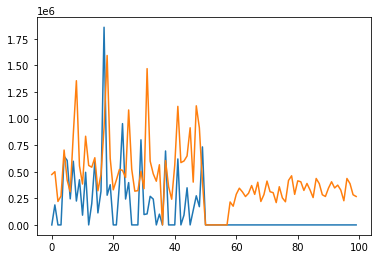

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array([axx,ayy])
X=X.transpose()
plt.plot(X)

División del dataset

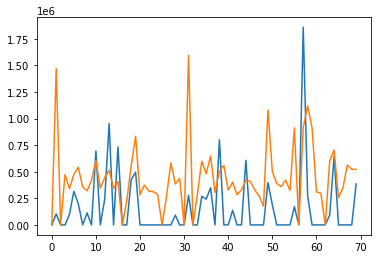

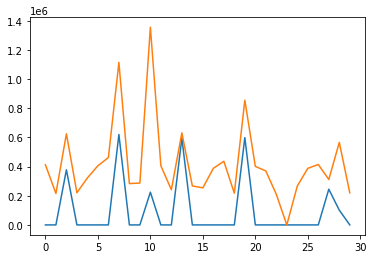

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,clases,test_size=0.3)
plt.plot(X_train)
plt.figure()
plt.plot(X_test)

Clases del grupo de prueba



In [ ]:
print(y_test)

[1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1.]
